In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv("dataset.csv")
df

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,University_Rank
0,337.0,118.0,4.5,4.5,9.65,1.0,1.0
1,324.0,107.0,4.0,4.5,8.87,1.0,13.0
2,316.0,104.0,3.0,3.5,8.00,1.0,23.0
3,322.0,110.0,3.5,2.5,8.67,1.0,17.0
4,314.0,103.0,2.0,3.0,8.21,0.0,28.0
...,...,...,...,...,...,...,...
545,310.0,109.0,1.0,3.0,7.50,1.0,NaN
546,292.0,117.0,3.5,4.0,7.80,0.0,NaN
547,295.0,105.0,2.5,3.5,7.40,1.0,NaN
548,311.0,94.0,3.0,3.5,8.00,0.0,NaN


In [ ]:
main_train=df[df.University_Rank.isnull()==False]
main_test=df[df.University_Rank.isnull()==True]

In [ ]:
main_train.shape,main_test.shape

((500, 7), (50, 7))

## **Preprocessing**

In [ ]:
main_train.isna().sum()

GRE_Score           8
TOEFL_Score        12
SOP                 8
LOR                 8
CGPA               10
Research            8
University_Rank     0
dtype: int64

In [ ]:
main_train[main_train.GRE_Score.isnull()]

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,University_Rank
422,NaN,115.0,2.5,3.0,7.36,1.0,11.0
438,NaN,99.0,4.5,4.0,9.08,0.0,38.0
451,NaN,94.0,4.5,NaN,9.60,1.0,37.0
457,NaN,99.0,3.5,NaN,8.14,1.0,29.0
464,NaN,110.0,5.0,4.5,8.97,1.0,1.0
473,NaN,117.0,4.0,4.0,8.26,1.0,10.0
479,NaN,94.0,3.5,2.0,9.91,1.0,31.0
498,NaN,102.0,4.0,2.0,NaN,0.0,34.0


In [ ]:
main_train[main_train.TOEFL_Score.isnull()]

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,University_Rank
400,312.0,NaN,3.0,4.0,9.13,1.0,24.0
417,306.0,NaN,4.5,2.5,8.90,0.0,30.0
425,290.0,NaN,4.0,1.5,9.22,1.0,40.0
434,333.0,NaN,2.5,3.5,9.11,1.0,8.0
452,336.0,NaN,4.0,2.5,8.80,1.0,5.0
455,292.0,NaN,4.5,3.5,8.34,NaN,38.0
459,339.0,NaN,3.5,4.0,7.86,1.0,2.0
462,297.0,NaN,NaN,3.5,8.56,0.0,35.0
470,324.0,NaN,4.0,2.0,9.53,0.0,14.0
482,338.0,NaN,3.0,3.0,8.15,1.0,4.0


In [ ]:
main_train = main_train[main_train.GRE_Score.isnull()==False]
main_train = main_train[main_train.TOEFL_Score.isnull()==False]
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRE_Score        480 non-null    float64
 1   TOEFL_Score      480 non-null    float64
 2   SOP              473 non-null    float64
 3   LOR              474 non-null    float64
 4   CGPA             471 non-null    float64
 5   Research         473 non-null    float64
 6   University_Rank  480 non-null    float64
dtypes: float64(7)
memory usage: 30.0 KB


In [ ]:
main_train[main_train.SOP.isnull()]

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,University_Rank
403,304.0,119.0,NaN,3.0,8.75,1.0,30.0
436,316.0,100.0,NaN,4.5,9.44,1.0,17.0
441,310.0,107.0,NaN,3.5,8.30,1.0,27.0
447,324.0,109.0,NaN,2.5,8.40,0.0,14.0
476,310.0,101.0,NaN,2.5,8.69,NaN,28.0
486,313.0,94.0,NaN,4.0,9.02,1.0,25.0
493,330.0,112.0,NaN,3.5,8.54,1.0,11.0


In [ ]:
main_train[main_train.LOR.isnull()]

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,University_Rank
401,324.0,116.0,4.0,NaN,8.97,1.0,13.0
414,330.0,98.0,1.5,NaN,9.76,1.0,11.0
429,329.0,107.0,4.5,NaN,8.16,0.0,10.0
439,321.0,117.0,3.5,NaN,8.00,0.0,15.0
463,328.0,103.0,4.5,NaN,9.01,1.0,11.0
490,329.0,94.0,4.5,NaN,8.83,NaN,10.0


In [ ]:
main_train[main_train.CGPA.isnull()]

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,University_Rank
406,310.0,92.0,3.0,5.0,NaN,0.0,28.0
412,304.0,93.0,1.5,3.5,NaN,0.0,31.0
433,309.0,111.0,3.5,4.5,NaN,1.0,28.0
443,339.0,119.0,4.5,2.0,NaN,0.0,2.0
454,305.0,114.0,3.5,3.0,NaN,0.0,30.0
466,290.0,100.0,5.0,4.0,NaN,1.0,38.0
471,300.0,118.0,3.0,3.0,NaN,1.0,34.0
484,302.0,94.0,3.5,2.5,NaN,0.0,32.0
492,327.0,96.0,1.5,3.0,NaN,1.0,12.0


In [ ]:
main_train['SOP'].describe()

count    473.000000
mean       3.406977
std        1.003075
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: SOP, dtype: float64

In [ ]:
median_sop = main_train.SOP.median()
median_lor = main_train.LOR.median()
median_cgpa = main_train.CGPA.median()
median_sop,median_lor,median_cgpa

(3.5, 3.5, 8.6)

In [ ]:
main_train.SOP = main_train.SOP.fillna(median_sop)
main_train.LOR = main_train.LOR.fillna(median_lor)
main_train.CGPA = main_train.CGPA.fillna(median_cgpa)

In [ ]:
main_train[main_train.Research.isnull()]

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,University_Rank
409,335.0,108.0,2.0,5.0,8.45,NaN,5.0
432,325.0,96.0,3.0,4.0,8.80,NaN,12.0
446,328.0,110.0,4.5,2.0,7.90,NaN,11.0
461,331.0,100.0,3.0,3.0,8.50,NaN,32.0
476,310.0,101.0,3.5,2.5,8.69,NaN,28.0
485,325.0,107.0,2.5,3.5,8.56,NaN,15.0
490,329.0,94.0,4.5,3.5,8.83,NaN,10.0


In [ ]:
main_train.Research = main_train.Research.fillna(0)
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRE_Score        480 non-null    float64
 1   TOEFL_Score      480 non-null    float64
 2   SOP              480 non-null    float64
 3   LOR              480 non-null    float64
 4   CGPA             480 non-null    float64
 5   Research         480 non-null    float64
 6   University_Rank  480 non-null    float64
dtypes: float64(7)
memory usage: 30.0 KB


# Split Data

In [ ]:
X=main_train.drop(['University_Rank'],axis=1)


In [ ]:
y=main_train['University_Rank']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0,shuffle=False)

In [ ]:
X_train.shape,X_test.shape

((336, 6), (144, 6))

## **EDA**

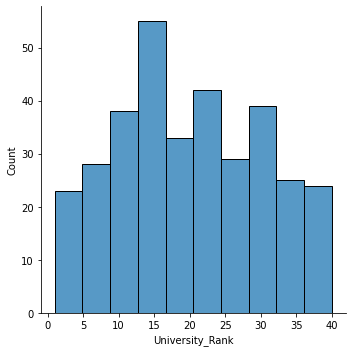

In [ ]:
sns.displot(y_train)

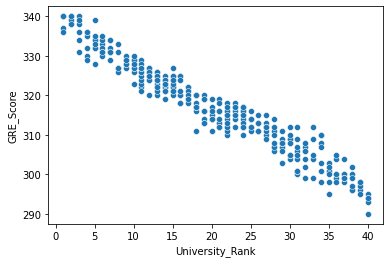

In [ ]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index),x='University_Rank',y='GRE_Score')

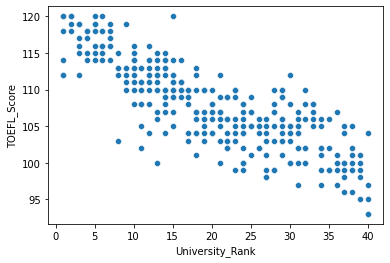

In [ ]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index),x='University_Rank',y='TOEFL_Score')

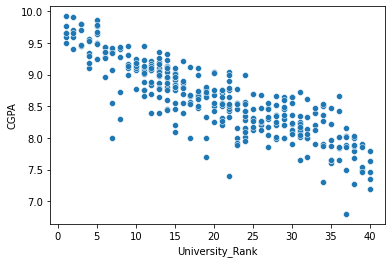

In [ ]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index),x='University_Rank',y='CGPA')

# **Feature** **Selection**

### Corelation Heatmap

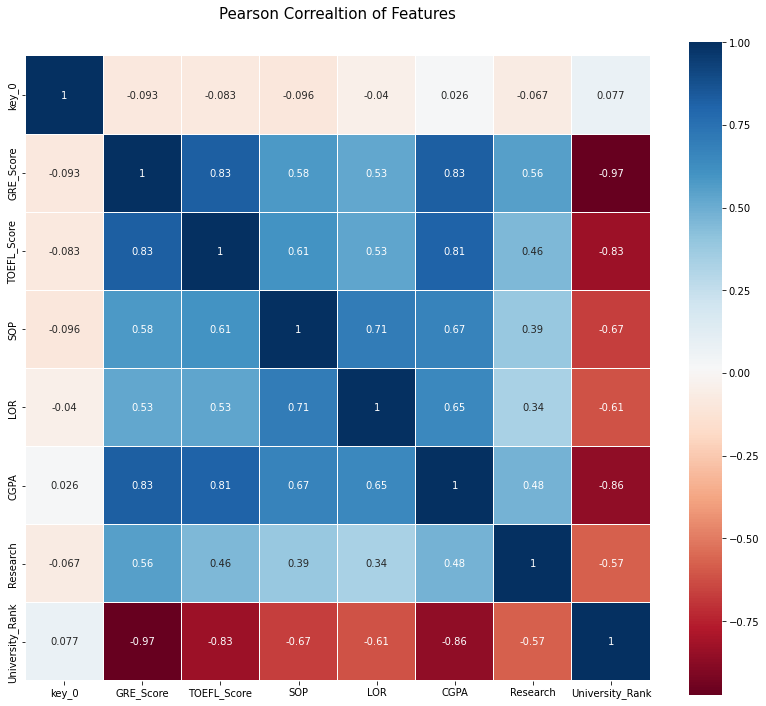

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correaltion of Features',y=1.05,size=15)
sns.heatmap(X_train.merge(y_train,on=X_train.index).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

# **Prediction**

### Multi Linear Regression

In [ ]:
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
Y_predict1 = pd.DataFrame(base_model.predict(X_test), columns=['Univeristy_Rank'])
Y_predict1 = Y_predict1.round(decimals=0)
Y_predict1,y_test

(     Univeristy_Rank
 0               20.0
 1                5.0
 2               14.0
 3               14.0
 4               25.0
 ..               ...
 139             10.0
 140             10.0
 141             26.0
 142             11.0
 143             34.0
 
 [144 rows x 1 columns], 336    19.0
 337     5.0
 338    14.0
 339    14.0
 340    26.0
        ... 
 493    11.0
 494    11.0
 495    28.0
 496    11.0
 499    32.0
 Name: University_Rank, Length: 144, dtype: float64)

In [ ]:
acc1=LinearRegression()
acc1.fit(Y_predict1,y_test)
acc1.score(Y_predict1,y_test)

0.9485218547264022

### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_model = DecisionTreeRegressor()

In [ ]:
decision_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
Y_predict2 = pd.DataFrame(decision_model.predict(X_test), columns=['Univeristy_Rank'])

In [ ]:
Y_predict2 = Y_predict2.round(decimals=0)
Y_predict2,y_test

(     Univeristy_Rank
 0               14.0
 1                5.0
 2               14.0
 3               14.0
 4               21.0
 ..               ...
 139              8.0
 140              9.0
 141             22.0
 142             11.0
 143             34.0
 
 [144 rows x 1 columns], 336    19.0
 337     5.0
 338    14.0
 339    14.0
 340    26.0
        ... 
 493    11.0
 494    11.0
 495    28.0
 496    11.0
 499    32.0
 Name: University_Rank, Length: 144, dtype: float64)

In [ ]:
acc2=DecisionTreeRegressor()
acc2.fit(Y_predict2,y_test)
acc2.score(Y_predict2,y_test)

0.9448755413643135

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_model=RandomForestRegressor(min_samples_leaf=12)
random_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=12)

In [ ]:
Y_predict3 = pd.DataFrame(random_model.predict(X_test), columns=['Univeristy_Rank'])
Y_predict3 = Y_predict3.round(decimals=0)
Y_predict3

,Univeristy_Rank
0,17.0
1,5.0
2,14.0
3,14.0
4,25.0
...,...
139,8.0
140,7.0
141,30.0
142,8.0


In [ ]:
acc3=RandomForestRegressor(min_samples_leaf=12)
acc3.fit(Y_predict3,y_test)
acc3.score(Y_predict3,y_test)

0.936577743141329